In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('thanksgiving-2015-poll-data.csv',encoding='latin-1')
#data.head()

In [3]:
data.head()

,RespondentID,Do you celebrate Thanksgiving?,What is typically the main dish at your Thanksgiving dinner?,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),How is the main dish typically cooked?,How is the main dish typically cooked? - Other (please specify),What kind of stuffing/dressing do you typically have?,What kind of stuffing/dressing do you typically have? - Other (please specify),What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have? - Other (please specify),...,Have you ever tried to meet up with hometown friends on Thanksgiving night?,"Have you ever attended a ""Friendsgiving?""",Will you shop any Black Friday sales on Thanksgiving Day?,Do you work in retail?,Will you employer make you work on Black Friday?,How would you describe where you live?,Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,4337954960,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,None,NaN,...,Yes,No,No,No,NaN,Suburban,18 - 29,Male,"$75,000 to $99,999",Middle Atlantic
1,4337951949,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Other (please specify),Homemade cranberry gelatin ring,...,No,No,Yes,No,NaN,Rural,18 - 29,Female,"$50,000 to $74,999",East South Central
2,4337935621,Yes,Turkey,NaN,Roasted,NaN,Rice-based,NaN,Homemade,NaN,...,Yes,Yes,Yes,No,NaN,Suburban,18 - 29,Male,"$0 to $9,999",Mountain
3,4337933040,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Homemade,NaN,...,Yes,No,No,No,NaN,Urban,30 - 44,Male,"$200,000 and up",Pacific
4,4337931983,Yes,Tofurkey,NaN,Baked,NaN,Bread-based,NaN,Canned,NaN,...,Yes,No,No,No,NaN,Urban,30 - 44,Male,"$100,000 to $124,999",Pacific


In [66]:
data['Do you celebrate Thanksgiving?'].unique()

array(['Yes', 'No'], dtype=object)

In [67]:
data['Do you celebrate Thanksgiving?'].value_counts()

Yes    980
No      78
Name: Do you celebrate Thanksgiving?, dtype: int64

In [8]:
data.columns[50:]

Index(['Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply.   - Other (please specify).1',
       'Do you typically pray before or after the Thanksgiving meal?',
       'How far will you travel for Thanksgiving?',
       'Will you watch any of the following programs on Thanksgiving? Please select all that apply. - Macy's Parade',
       'What's the age cutoff at your "kids' table" at Thanksgiving?',
       'Have you ever tried to meet up with hometown friends on Thanksgiving night?',
       'Have you ever attended a "Friendsgiving?"',
       'Will you shop any Black Friday sales on Thanksgiving Day?',
       'Do you work in retail?',
       'Will you employer make you work on Black Friday?',
       'How would you describe where you live?', 'Age', 'What is your gender?',
       'How much total combined money did all members of your HOUSEHOLD earn last year?',
       'US Region'],
      dtype='object')

In [68]:
data['What is your gender?'].value_counts(dropna=False)

Female    544
Male      481
NaN        33
Name: What is your gender?, dtype: int64

In [8]:
import math
def gender_code(gender_string):
    if isinstance(gender_string,float) and math.isnan(gender_string):
        return gender_string
    return int(gender_string=='Female')

data['gender'] = data['What is your gender?'].apply(gender_code)

In [9]:
data['gender'].value_counts(dropna=False)

1.0    544
0.0    481
NaN     33
Name: gender, dtype: int64

In [15]:
#data = data.drop(columns=['What is your gender?'])
#data.columns

Index(['RespondentID', 'Do you celebrate Thanksgiving?',
       'What is typically the main dish at your Thanksgiving dinner?',
       'What is typically the main dish at your Thanksgiving dinner? - Other (please specify)',
       'How is the main dish typically cooked?',
       'How is the main dish typically cooked? - Other (please specify)',
       'What kind of stuffing/dressing do you typically have?',
       'What kind of stuffing/dressing do you typically have? - Other (please specify)',
       'What type of cranberry saucedo you typically have?',
       'What type of cranberry saucedo you typically have? - Other (please specify)',
       'Do you typically have gravy?',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Brussel sprouts',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Carrots',
       'Which of these side dishes aretypically served

In [16]:
#data.apply(lambda x:x.dtype).head()

RespondentID                                                                             object
Do you celebrate Thanksgiving?                                                           object
What is typically the main dish at your Thanksgiving dinner?                             object
What is typically the main dish at your Thanksgiving dinner? - Other (please specify)    object
How is the main dish typically cooked?                                                   object
dtype: object

In [71]:
data['How much total combined money did all members of your HOUSEHOLD earn last year?'].value_counts(dropna=False)

$25,000 to $49,999      180
Prefer not to answer    136
$50,000 to $74,999      135
$75,000 to $99,999      133
$100,000 to $124,999    111
$200,000 and up          80
$10,000 to $24,999       68
$0 to $9,999             66
$125,000 to $149,999     49
$150,000 to $174,999     40
NaN                      33
$175,000 to $199,999     27
Name: How much total combined money did all members of your HOUSEHOLD earn last year?, dtype: int64

In [10]:
def clean_income(value):
    if value=='$200,000 and up':
        return 200000
    elif value=='Prefer not to answer':
        return np.nan
    elif isinstance(value,float) and math.isnan(value):
        return np.nan
    value = value.replace(',','').replace('$','')
    #print(value)
    high_income,low_income = value.split(' to ')
    return (int(high_income)+int(low_income))/2
    

In [11]:
data['income'] = data['How much total combined money did all members of your HOUSEHOLD earn last year?'].apply(clean_income)

In [92]:
data['income'].head()

0     87499.5
1     62499.5
2      4999.5
3    200000.0
4    112499.5
Name: income, dtype: float64

In [93]:
data['income'].unique

<bound method Series.unique of 0        87499.5
1        62499.5
2         4999.5
3       200000.0
4       112499.5
          ...   
1053    112499.5
1054     62499.5
1055    112499.5
1056         NaN
1057         NaN
Name: income, Length: 1058, dtype: float64>

In [94]:
data['What type of cranberry saucedo you typically have?'].value_counts()

Canned                    502
Homemade                  301
None                      146
Other (please specify)     25
Name: What type of cranberry saucedo you typically have?, dtype: int64

In [95]:
homemade = data[data['What type of cranberry saucedo you typically have?']=='Homemade']
canned = data[data['What type of cranberry saucedo you typically have?']=='Canned']
#create dataframes with these filter

In [96]:
homemade['income'].mean()

94878.1072874494

In [97]:
canned['income'].mean()

83823.40340909091

In [98]:
#people with higher income preferred homemade rather than canned

In [13]:
grouped_cranberry = data.groupby('What type of cranberry saucedo you typically have?')
grouped_cranberry

In [101]:
grouped_cranberry.groups

{'Canned': Int64Index([   4,    6,    8,   11,   12,   15,   18,   19,   26,   27,
             ...
             1040, 1041, 1042, 1044, 1045, 1046, 1047, 1051, 1054, 1057],
            dtype='int64', length=502),
 'Homemade': Int64Index([   2,    3,    5,    7,   13,   14,   16,   20,   21,   23,
             ...
             1016, 1017, 1025, 1027, 1030, 1034, 1048, 1049, 1053, 1056],
            dtype='int64', length=301),
 'None': Int64Index([   0,   17,   24,   29,   34,   36,   40,   47,   49,   51,
             ...
              980,  981,  997, 1015, 1018, 1031, 1037, 1043, 1050, 1055],
            dtype='int64', length=146),
 'Other (please specify)': Int64Index([   1,    9,  154,  216,  221,  233,  249,  265,  301,  336,  380,
              435,  444,  447,  513,  550,  749,  750,  784,  807,  860,  872,
              905, 1000, 1007],
            dtype='int64')}

In [102]:
grouped_cranberry.size()

What type of cranberry saucedo you typically have?
Canned                    502
Homemade                  301
None                      146
Other (please specify)     25
dtype: int64

In [15]:
grouped_cranberry['income'].mean()
grouped_cranberry['income'].agg(np.mean)

What type of cranberry saucedo you typically have?
Canned                    83823.403409
Homemade                  94878.107287
None                      78886.084034
Other (please specify)    86629.978261
Name: income, dtype: float64

In [16]:
grouped_df = grouped_cranberry.agg(np.mean) #only calculates for int/float columns
#grouped_cranberry.mean()
grouped_df

,RespondentID,gender,income
What type of cranberry saucedo you typically have?,,,
Canned,4.336699e+09,0.552846,83823.403409
Homemade,4.336792e+09,0.533101,94878.107287
None,4.336765e+09,0.517483,78886.084034
Other (please specify),4.336763e+09,0.640000,86629.978261


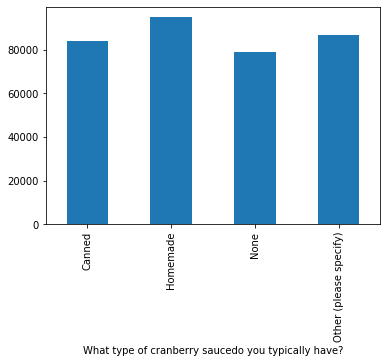

In [116]:
#plt.hist(grouped_df['income'],bins=20)
grouped_df['income'].plot(kind='bar')

In [120]:
grouped = data.groupby(['What type of cranberry saucedo you typically have?','What is typically the main dish at your Thanksgiving dinner?'])

In [123]:
grouped.agg(np.mean)

RespondentID  \
What type of cranberry saucedo you typically have? What is typically the main dish at your Thanksg...                 
Canned                                             Chicken                                             4.336354e+09   
                                                   Ham/Pork                                            4.336757e+09   
                                                   I don't know                                        4.335987e+09   
                                                   Other (please specify)                              4.336682e+09   
                                                   Roast beef                                          4.336254e+09   
                                                   Tofurkey                                            4.337157e+09   
                                                   Turkey                                              4.336705e+09   
Homemade                                           Chicken                                             4.336540e+09   
                                                   Ham/Pork                                            4.337253e+09   
                                                   I don't know                                        4.336084e+09   
                                                   Other (please specify)                              4.336863e+09   
                                                   Roast beef                                          4.336174e+09   
                                                   Tofurkey                                            4.336790e+09   
                                                   Turducken                                           4.337475e+09   
                                                   Turkey                                              4.336791e+09   
None                                               Chicken                                             4.336151e+09   
                                                   Ham/Pork                                            4.336680e+09   
                                                   I don't know                                        4.336412e+09   
                                                   Other (please specify)                              4.336688e+09   
                                                   Roast beef                                          4.337424e+09   
                                                   Tofurkey                                            4.336950e+09   
                                                   Turducken                                           4.336739e+09   
                                                   Turkey                                              4.336784e+09   
Other (please specify)                             Ham/Pork                                            4.336465e+09   
                                                   Other (please specify)                              4.337335e+09   
                                                   Tofurkey                                            4.336122e+09   
                                                   Turkey                                              4.336724e+09   

                                                                                                         gender  \
What type of cranberry saucedo you typically have? What is typically the main dish at your Thanksg...             
Canned                                             Chicken                                             0.333333   
                                                   Ham/Pork                                            0.642857   
                                                   I don't know                                        0.000000   
                                                   Other (please specify)   

In [126]:
grouped['income'].agg([np.mean,np.sum,np.std]).head()

mean  \
What type of cranberry saucedo you typically have? What is typically the main dish at your Thanksg...                 
Canned                                             Chicken                                             80999.600000   
                                                   Ham/Pork                                            77499.535714   
                                                   I don't know                                         4999.500000   
                                                   Other (please specify)                              53213.785714   
                                                   Roast beef                                          25499.500000   

                                                                                                             sum  \
What type of cranberry saucedo you typically have? What is typically the main dish at your Thanksg...              
Canned                                             Chicken                                              404998.0   
                                                   Ham/Pork                                            1084993.5   
                                                   I don't know                                           4999.5   
                                                   Other (please specify)                               372496.5   
                                                   Roast beef                                           127497.5   

                                                                                                                std  
What type of cranberry saucedo you typically have? What is typically the main dish at your Thanksg...                
Canned                                             Chicken                                             75779.481062  
                                                   Ham/Pork                                            56645.063944  
                                                   I don't know                                                 NaN  
                                                   Other (please specify)                              29780.946290  
                                                   Roast beef                                          24584.039538

In [136]:
grouped = data.groupby('How would you describe where you live?')['What is typically the main dish at your Thanksgiving dinner?']

In [137]:
grouped

In [138]:
grouped.apply(lambda x : x.value_counts())

How would you describe where you live?                        
Rural                                   Turkey                    189
                                        Other (please specify)      9
                                        Ham/Pork                    7
                                        I don't know                3
                                        Tofurkey                    3
                                        Turducken                   2
                                        Chicken                     2
                                        Roast beef                  1
Suburban                                Turkey                    449
                                        Ham/Pork                   17
                                        Other (please specify)     13
                                        Tofurkey                    9
                                        Roast beef                  3
                           

In [1]:
from scipy.stats import sem,t

In [ ]:
t()